<a href="https://colab.research.google.com/github/theqasimkhan/Programming-For-AI-Lab/blob/main/Training_a_Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Qasim Khan**
# **B22F0248AI051**
# **AI-Blue**

# **Objectives**
● Read data from CSV files.

● Explore datasets and check for missing values.

● Display data values and visualize data using graphs.

● Identify anomalies in the dataset.

● Provide a clear description of the dataset.

# **Prerequisite**
● Python installed with packages: pandas, numpy, matplotlib, seaborn

● Basic understanding of Python programming and data analysis
concepts.

# **Step 1: Reading Data from a CSV File**

In [4]:
from google.colab import files
uploaded = files.upload()
# Once uploaded, you can read the file
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())


Saving StudentsPerformance.csv to StudentsPerformance (3).csv
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


# **Step 2:**
Explore the structure of the dataset, including data types and basic
statistics.

In [5]:
print (df.isnull().sum())
print (df[df.isnull().any(axis=1)])

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


# **Step 3: Perform Preprocessing Steps**
Let's check for missing values and other preprocessing steps.


In [14]:
# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   math score zscore            1000 non-null   float64
 9   reading score zscore         1000 non-null   float64
 10  writing score zscore         1000 non-null   float64
 11  math score anomaly           1000 non-null   bool   
 12  reading score anomaly        1000 non-null   bool   
 13  writing score anoma

# **Step 5: Find the Correlation Between the Target Variable and Input Features**
Assume we are interested in predicting 'math score'. Let's find the correlation of 'math score' with other features.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation of 'math score' with other features
print(correlation_matrix['math score'])


math score                                        1.000000
reading score                                     0.817580
writing score                                     0.802642
math score zscore                                 1.000000
reading score zscore                              0.817580
writing score zscore                              0.802642
math score anomaly                               -0.229308
reading score anomaly                            -0.207355
writing score anomaly                            -0.184357
combined anomaly                                 -0.260870
gender_female                                    -0.167982
gender_male                                       0.167982
race/ethnicity_group A                           -0.091977
race/ethnicity_group B                           -0.084250
race/ethnicity_group C                           -0.073387
race/ethnicity_group D                            0.050071
race/ethnicity_group E                            0.2058

# **Step 6. Visualize the Data via Graphs**
Let's create some visualizations.

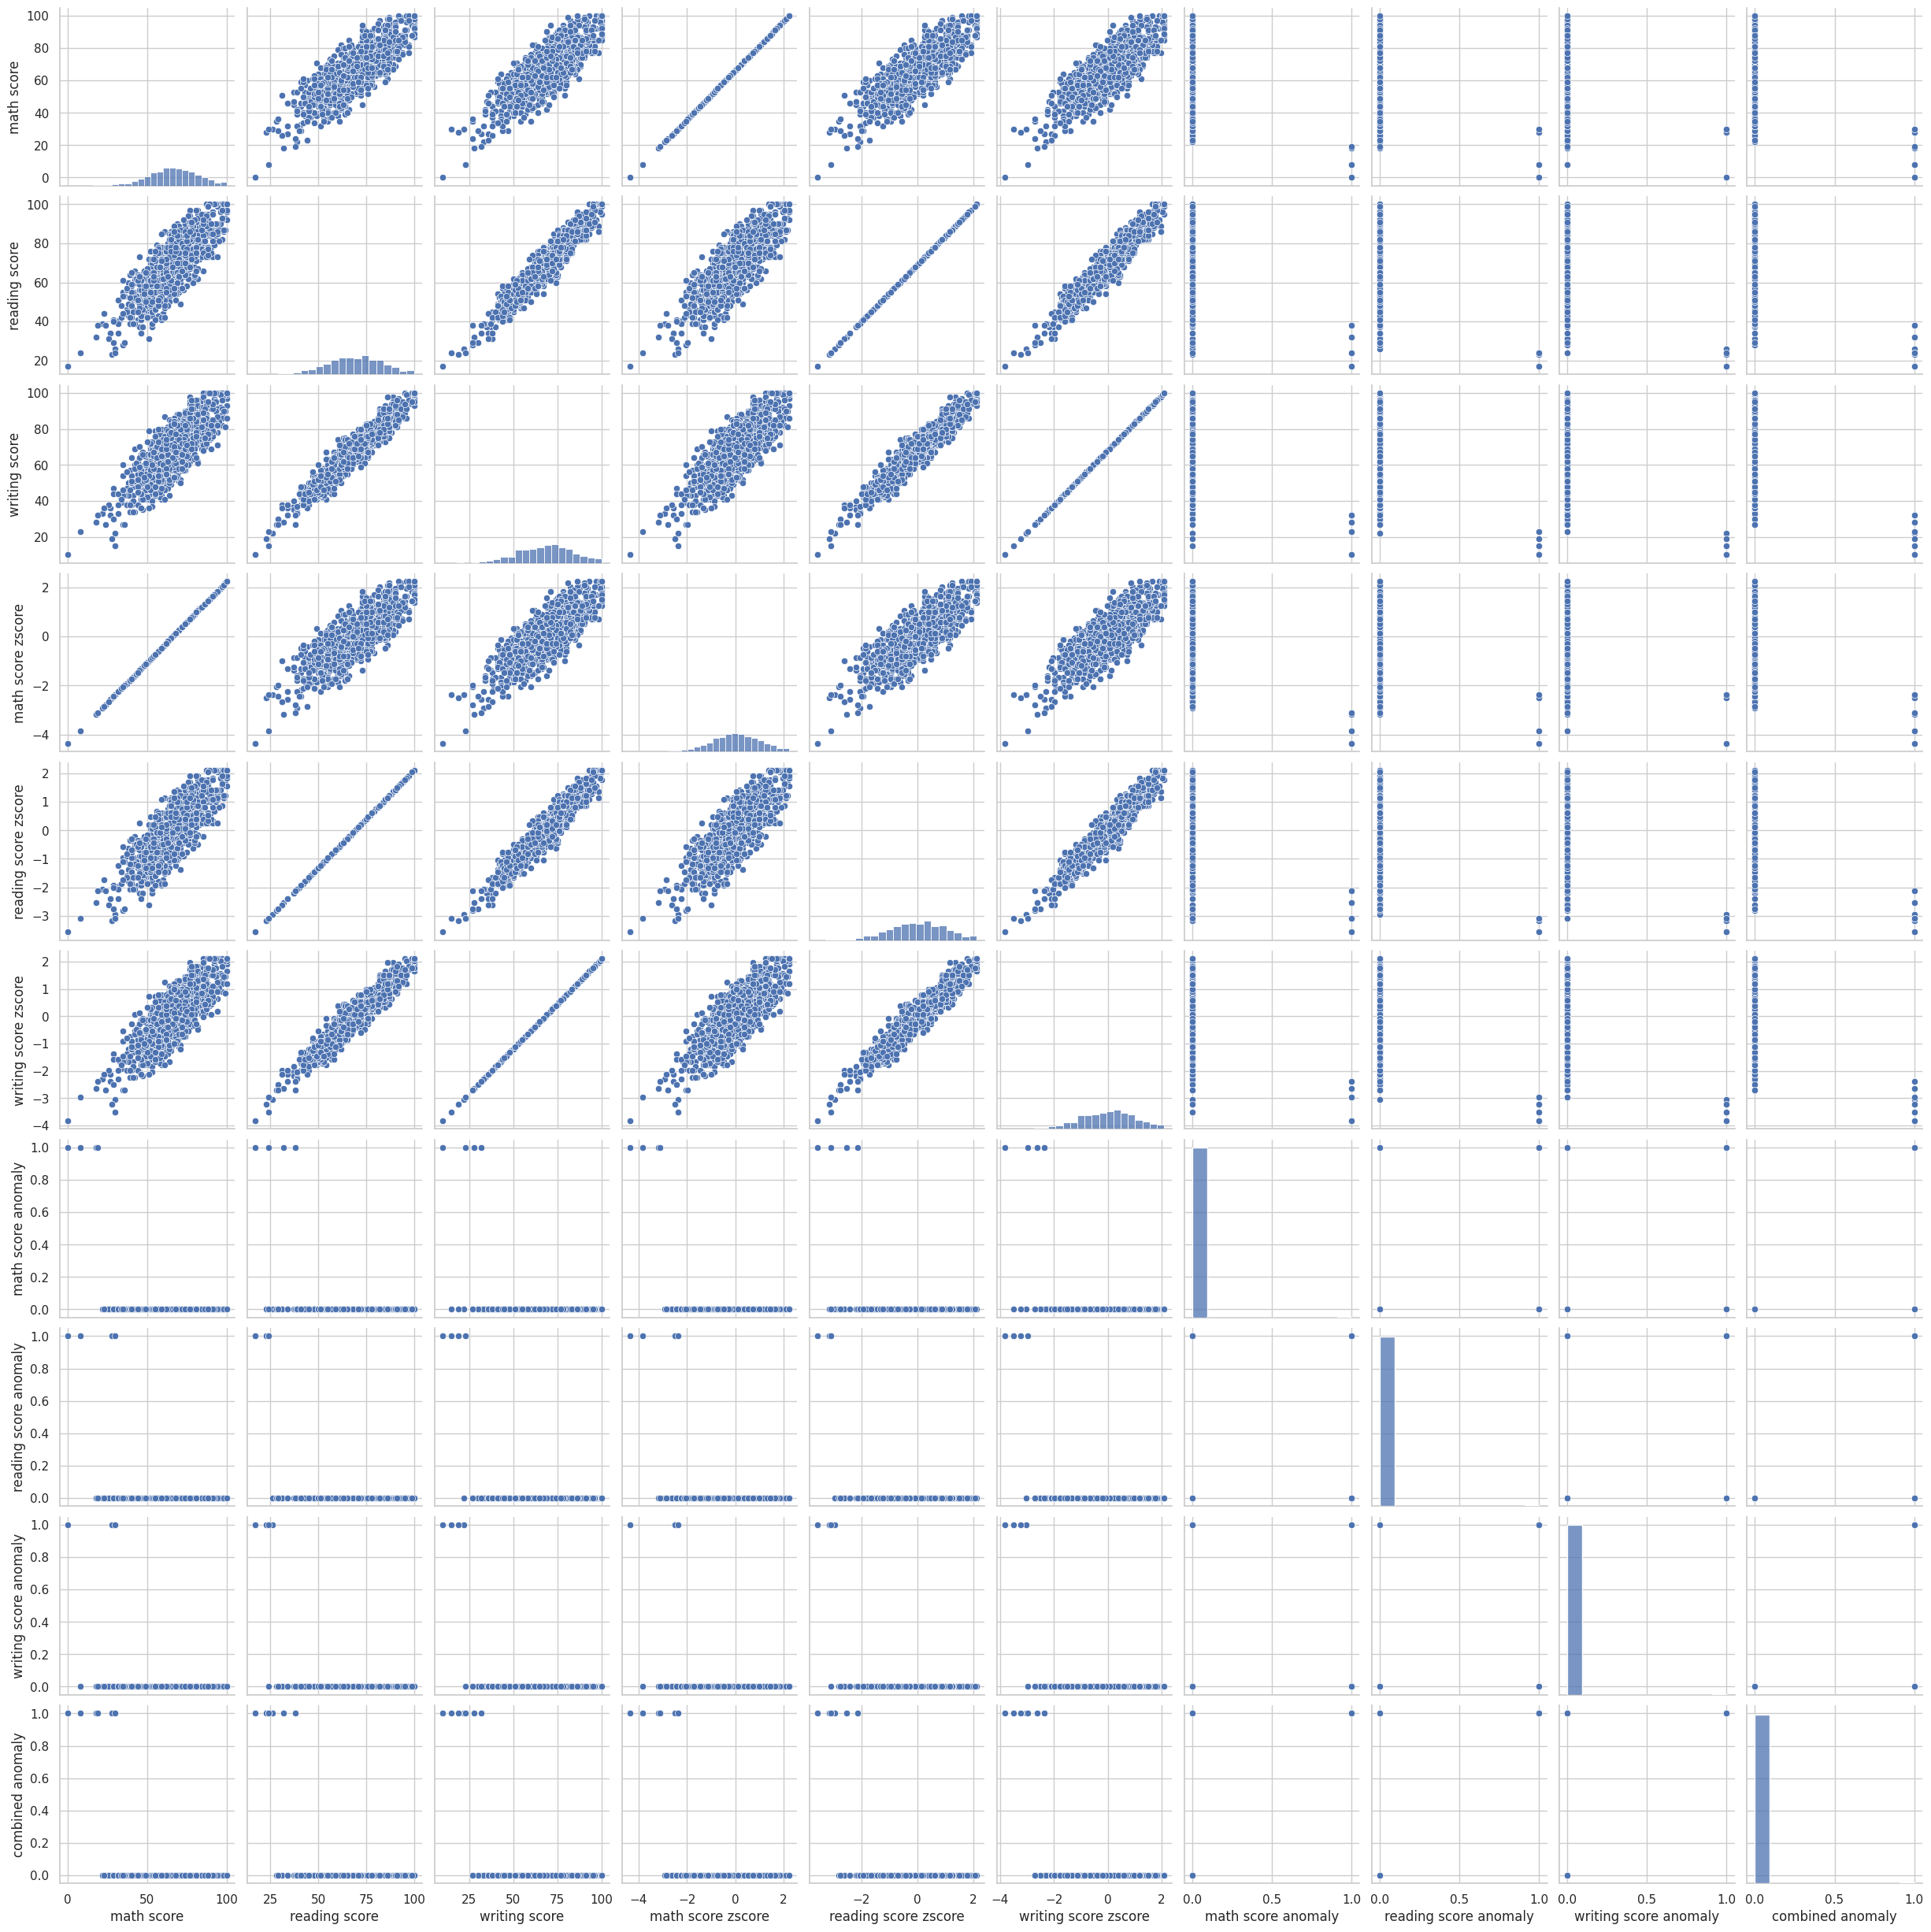

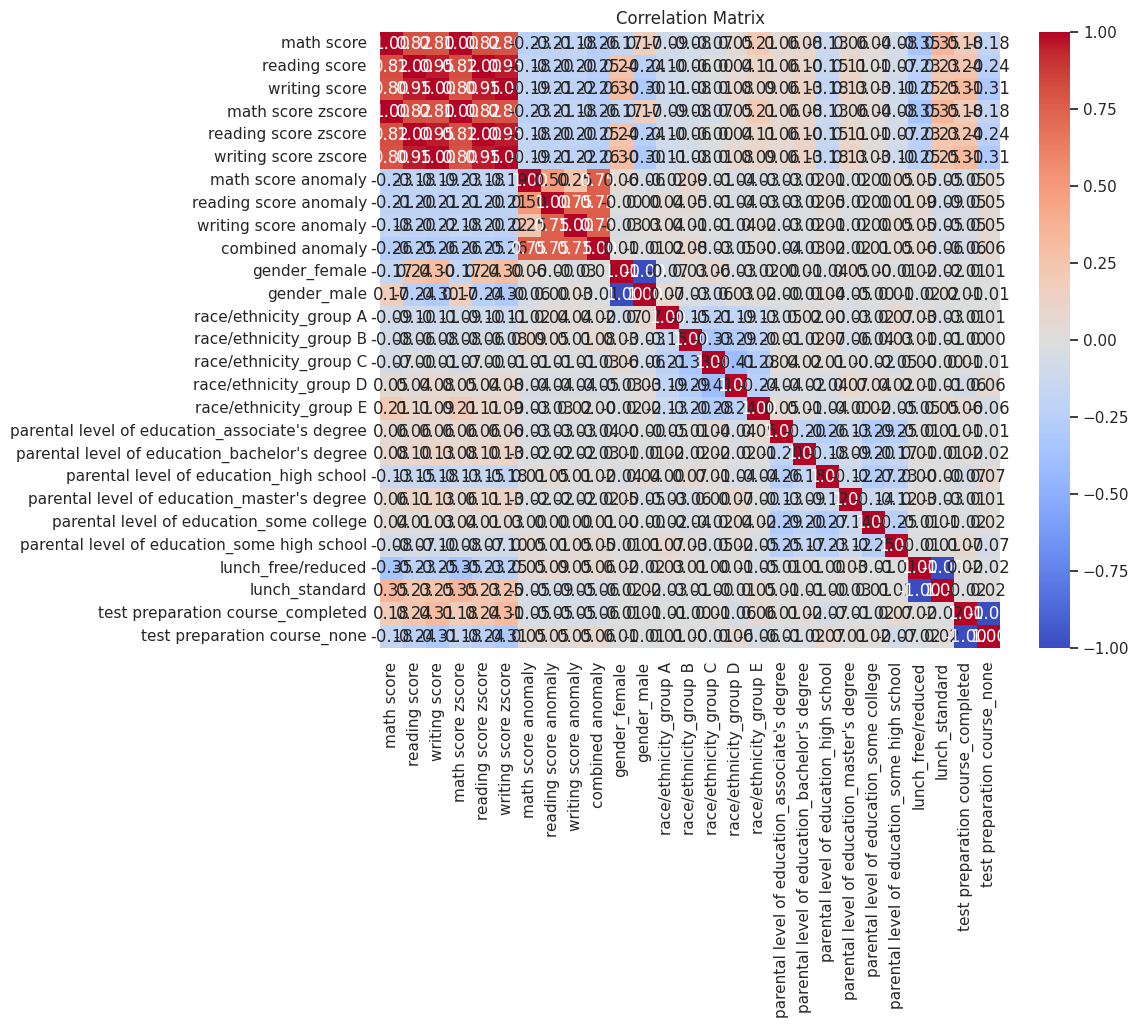

In [19]:
# Set seaborn style
sns.set(style="whitegrid")

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Step 7. Split the Dataset into Train and Test Sets**
Define the target variable and features. Assume 'math score' is the target variable.


In [20]:
# Define the target variable and features
X = df_encoded.drop('math score', axis=1)  # Features
y = df_encoded['math score']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape}')
print(f'Testing data size: {X_test.shape}')


Training data size: (800, 26)
Testing data size: (200, 26)


# **Step 8. Train a Simple Linear Regression Model on the Dataset**

In [21]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

# **Step 9. Evaluate the Model and Find the Accuracy**

Mean Squared Error: 8.915264188700951e-26
R-squared: 1.0


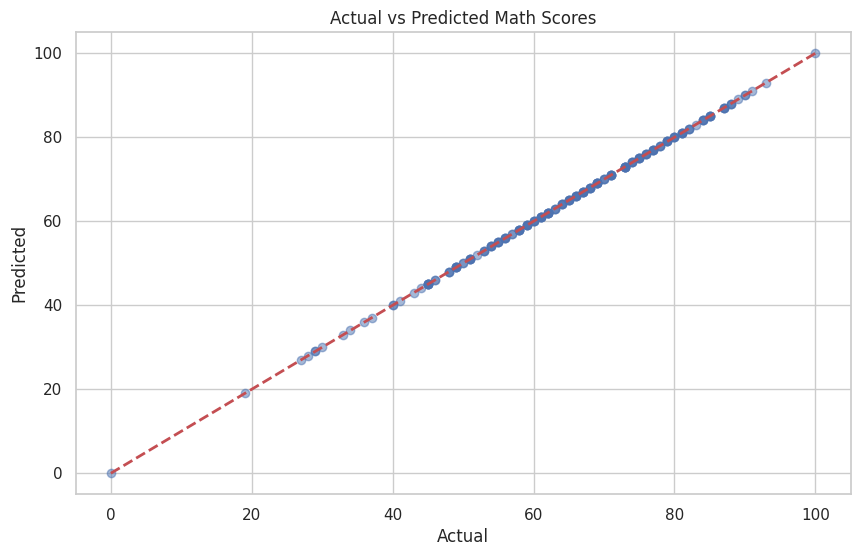

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Visualize the comparison between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Math Scores')
plt.show()


These steps should help you process the dataset, identify correlations, visualize the data, split the data into training and testing sets, train a linear regression model, and evaluate its performance.